## Task 1

In [3]:
%matplotlib inline
import numpy as np
sng = np.zeros(450)
cos = []
for n in range(100):
    cos.append(np.cos(2 * np.pi * 0.1 * n))
cos = np.array(cos)
y = np.concatenate((sng, cos, sng))
y_n = y + np.sqrt(0.5) * np.random.randn(y.size)

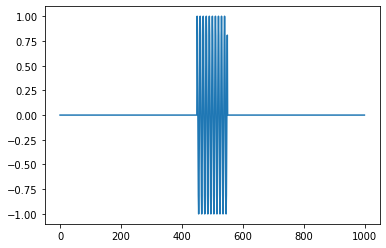

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.show()

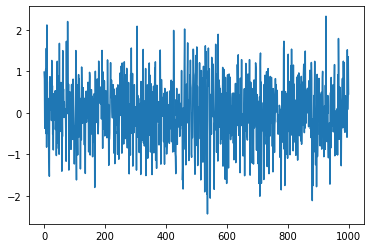

In [5]:
plt.plot(range(len(y_n)), y_n)
plt.show()

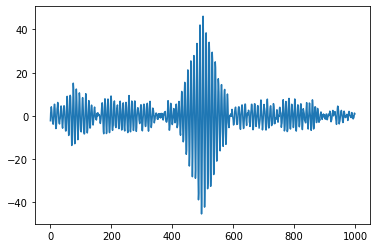

In [6]:
conv = np.convolve(y_n, y, "same")
plt.plot(range(len(conv)), conv)
plt.show()

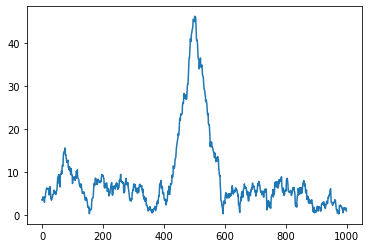

In [7]:
h = np.exp(-2 * np.pi * 1j * 0.1 * np.arange(100))
rand = np.abs(np.convolve(h, y_n, 'same'))
plt.plot(range(len(rand)), rand)
plt.show()

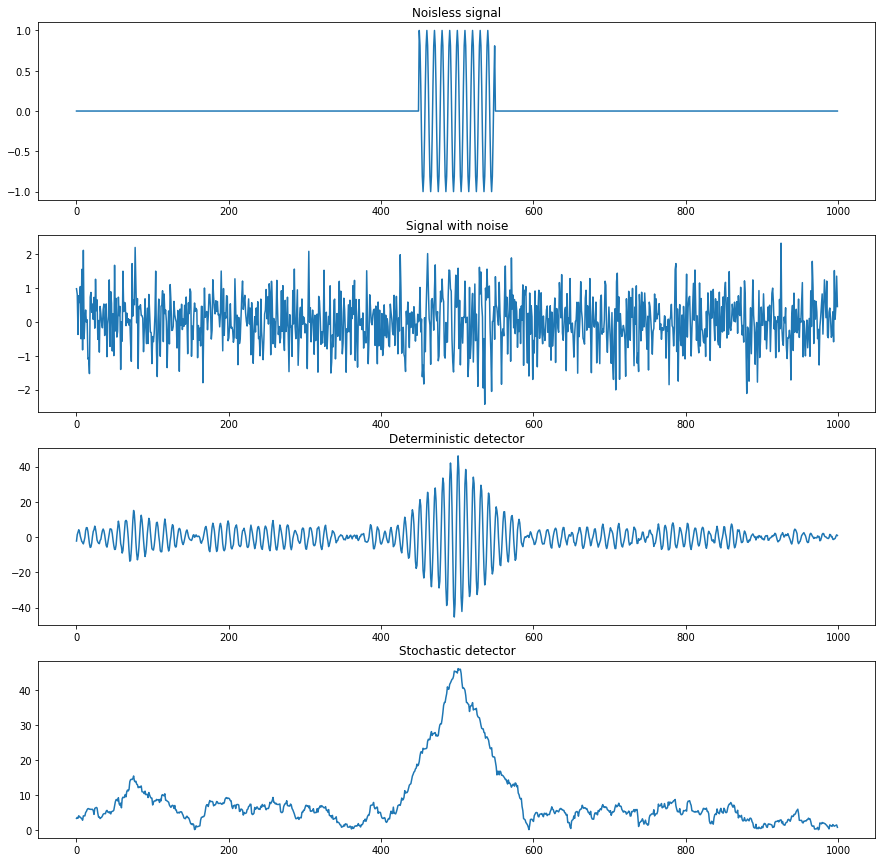

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(15,15)) # Create a figure with 4 axes
ax[0].plot(y)
ax[0].set_title('Noisless signal') # This will be the topmost axis
ax[1].plot(y_n)
ax[1].set_title('Signal with noise') # This will be the second axis
ax[2].plot(conv)
ax[2].set_title('Deterministic detector') # This will be the 3rd axis
ax[3].plot(rand)
ax[3].set_title('Stochastic detector') # This will be the 4th axis
plt.show() 

## Task 2

In [9]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mat = loadmat("Ex1_data/twoClassData.mat")
X = mat["X"]
y = mat["y"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train) 

pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)

print("KNN with default parameters accuracy: ", acc)

KNN with default parameters accuracy:  0.91


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)

print("LDA with default parameters accuracy: ", acc)

LDA with default parameters accuracy:  0.9
